In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn import metrics as skm
from sklearn.linear_model import SGDClassifier

### RandomForest Modelling

##### Basic random forest

In [ ]:
# Instantiate a random forests classifer
rf = RandomForestClassifier(random_state=20)
# Fitting the data to the data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
# predicted probabilities using .predict_proba()
y_pred_prob = rf.predict_proba(X_validation)
# predicted classes using .predict()
y_pred = rf.predict(X_validation)

#### Confusion_matrix

In [ ]:
#Confusion matrix
confusion_matrix(y_validation, y_pred)

array([[55974,     2],
       [ 4960,     5]])

In [ ]:
#Classification report
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55976
           1       0.71      0.00      0.00      4965

    accuracy                           0.92     60941
   macro avg       0.82      0.50      0.48     60941
weighted avg       0.90      0.92      0.88     60941



In [ ]:
# calculating roc_auc_score for our target class = 1
print(roc_auc_score(y_validation, y_pred_prob[:,0]))

0.3237936996736193


In [ ]:
# calculating roc_auc_score for our target class = 0
print(roc_auc_score(y_validation, y_pred_prob[:,1]))

0.6762063003263807


In [ ]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_validation)

y_train_proba = rf.predict_proba(X_train)
y_test_proba = rf.predict_proba(X_validation)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred))
print("Precision Train:", skm.precision_score(y_train, y_train_pred))
print("Recall Train:", skm.recall_score(y_train, y_train_pred))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_pred))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_pred))
print("Precision Test:", skm.precision_score(y_validation, y_test_pred))
print("Recall Test:", skm.recall_score(y_validation, y_test_pred))
print("AUC score", skm.roc_auc_score(y_validation, y_test_proba[:,1]))

Train Confusion Matrix: 
 [[223896      0]
 [    15  19845]]
Accuracy Train: 0.9999384630532171
Precision Train: 1.0
Recall Train: 0.9992447129909365
AUC score 1.0

 Test Confusion Matrix: 
 [[55974     2]
 [ 4960     5]]
Accuracy Test: 0.9185769842962865
Precision Test: 0.7142857142857143
Recall Test: 0.0010070493454179255
AUC score 0.6762063003263807


#### RandomForest with GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200],
'max_features': [2,4,6,8],
'max_depth':[6,8,10,12]}

# create Random Forest model 
rf=RandomForestClassifier()

# Use 5 cross-fold and for scoring use "roc_auc" 
rf_Grid = GridSearchCV(rf, param_grid, cv = 5, scoring = 'roc_auc')

In [ ]:
#fit our model to our train data
rf_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
#To identify the best performing model
rf_Grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Re-running the model with the best estimators

rf_Grid = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_Grid.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#  .predict() to get predicted classes.
y_pred_grid = rf_Grid.predict(X_validation)
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid = rf_Grid.predict_proba(X_validation)
y_predprob_grid

array([[0.9295983 , 0.0704017 ],
       [0.89855257, 0.10144743],
       [0.95239512, 0.04760488],
       ...,
       [0.92848624, 0.07151376],
       [0.92516974, 0.07483026],
       [0.92696601, 0.07303399]])

In [ ]:
print(classification_report(y_validation, y_pred_grid))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55976
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     60941
   macro avg       0.46      0.50      0.48     60941
weighted avg       0.84      0.92      0.88     60941



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion_matrix
confusion_matrix(y_validation, y_pred_grid)

array([[55976,     0],
       [ 4965,     0]])

In [ ]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_validation, y_pred_grid))

0.5


In [ ]:
#predicting the train error score
y_pred_train_grid = rf_Grid.predict(X_train)

In [ ]:
#Classification report
print(classification_report(y_train, y_pred_train_grid))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    223896
           1       0.00      0.00      0.00     19860

    accuracy                           0.92    243756
   macro avg       0.46      0.50      0.48    243756
weighted avg       0.84      0.92      0.88    243756



In [ ]:
# confusion_matrix for our predicted and actual train target class
confusion_matrix(y_train, y_pred_train_grid)

array([[223896,      0],
       [ 19860,      0]])

In [ ]:
# roc_auc_score for predicted and actual train target class
print(roc_auc_score(y_train, y_pred_train_grid))

0.5


In [ ]:
y_train_gridpred_df = rf.predict(X_train)
y_test_gridpred_df = rf.predict(X_validation)

y_train_gridproba_df = rf.predict_proba(X_train)
y_test_gridproba_df = rf.predict_proba(X_validation)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_gridpred_df))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_gridpred_df))
print("Precision Train:", skm.precision_score(y_train, y_train_gridpred_df))
print("Recall Train:", skm.recall_score(y_train, y_train_gridpred_df))
print("AUC score", skm.roc_auc_score(y_train, y_train_gridproba_df[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_gridpred_df))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_gridpred_df))
print("Precision Test:", skm.precision_score(y_validation, y_test_gridpred_df))
print("Recall Test:", skm.recall_score(y_validation, y_test_gridpred_df))
print("AUC score", skm.roc_auc_score(y_validation, y_test_gridproba_df[:,1]))

Train Confusion Matrix: 
 [[223896      0]
 [    15  19845]]
Accuracy Train: 0.9999384630532171
Precision Train: 1.0
Recall Train: 0.9992447129909365
AUC score 1.0

 Test Confusion Matrix: 
 [[55974     2]
 [ 4960     5]]
Accuracy Test: 0.9185769842962865
Precision Test: 0.7142857142857143
Recall Test: 0.0010070493454179255
AUC score 0.6762063003263807


### Undersampling the majority class

In [115]:
# extreme undersampling major class 
under = RandomUnderSampler(sampling_strategy=1)
X_train_usm, y_train_usm = under.fit_sample(X_train.astype('float'), y_train)
print("Before usm: ", Counter(y_train))
print("After usm: ", Counter(y_train_usm))

Before usm:  Counter({0: 223896, 1: 19860})
After usm:  Counter({0: 19860, 1: 19860})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
param_grid = {'n_estimators': [50, 100, 150, 200],
'max_features': [2,4,6,8],
'max_depth':[6,8,10,12]}

# create Random Forest model 
rf=RandomForestClassifier(random_state=20)

# Use 5 cross-fold and for scoring use "roc_auc" 
rf_Grid_2 = GridSearchCV(rf, param_grid, cv = 5, scoring = 'roc_auc')

In [ ]:
#fit our model to our train data
rf_Grid_2.fit(X_train_usm,y_train_usm)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=20,
                                  

In [ ]:
#To identify the best performing parameters
rf_Grid_2.best_params_

{'max_depth': 12, 'max_features': 8, 'n_estimators': 200}

In [ ]:
#To identify the best performing model
rf_Grid_2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [117]:
#Re-running the model with the best estimators

rf_Grid_2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

rf_Grid_2.fit(X_train_usm,y_train_usm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [118]:
#  .predict() to get predicted classes.
y_pred_grid_2 = rf_Grid_2.predict(X_validation)
y_pred_grid_2

array([0, 1, 0, ..., 0, 0, 1])

In [119]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid_2 = rf_Grid_2.predict_proba(X_validation)
y_predprob_grid_2

array([[0.59182448, 0.40817552],
       [0.47274374, 0.52725626],
       [0.65525788, 0.34474212],
       ...,
       [0.5382035 , 0.4617965 ],
       [0.54216172, 0.45783828],
       [0.48426918, 0.51573082]])

In [120]:
print(classification_report(y_validation, y_pred_grid_2))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     55976
           1       0.14      0.64      0.23      4965

    accuracy                           0.65     60941
   macro avg       0.55      0.65      0.50     60941
weighted avg       0.89      0.65      0.73     60941



In [121]:
# confusion_matrix
confusion_matrix(y_validation, y_pred_grid_2)

array([[36497, 19479],
       [ 1778,  3187]])

In [122]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_validation, y_pred_grid_2))

0.6469524145796336


In [123]:
#predicting the train error score
y_pred_train_grid2 = rf_Grid_2.predict(X_train_usm)

In [124]:
#Classification report
print(classification_report(y_train_usm, y_pred_train_grid2))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77     19860
           1       0.76      0.78      0.77     19860

    accuracy                           0.77     39720
   macro avg       0.77      0.77      0.77     39720
weighted avg       0.77      0.77      0.77     39720



In [ ]:
# confusion_matrix for our predicted and actual train target class
confusion_matrix(y_train_usm, y_pred_train_grid2)

array([[15142,  4718],
       [ 4499, 15361]])

In [ ]:
# roc_auc_score for predicted and actual train target class
print(roc_auc_score(y_train_usm, y_pred_train_grid2))

0.7679506545820746


In [125]:
y_train_gridpred_usm = rf_Grid_2.predict(X_train_usm)
y_test_gridpred_usm = rf_Grid_2.predict(X_validation)

y_train_gridproba_usm = rf_Grid_2.predict_proba(X_train_usm)
y_test_gridproba_usm = rf_Grid_2.predict_proba(X_validation)

In [126]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train_usm, y_train_gridpred_usm))
print("Accuracy Train:", skm.accuracy_score(y_train_usm, y_train_gridpred_usm))
print("Precision Train:", skm.precision_score(y_train_usm, y_train_gridpred_usm))
print("Recall Train:", skm.recall_score(y_train_usm, y_train_gridpred_usm))
print("AUC score", skm.roc_auc_score(y_train_usm, y_train_gridproba_usm[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_gridpred_usm))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_gridpred_usm))
print("Precision Test:", skm.precision_score(y_validation, y_test_gridpred_usm))
print("Recall Test:", skm.recall_score(y_validation, y_test_gridpred_usm))
print("AUC score", skm.roc_auc_score(y_validation, y_test_gridproba_usm[:,1]))

Train Confusion Matrix: 
 [[15105  4755]
 [ 4463 15397]]
Accuracy Train: 0.767925478348439
Precision Train: 0.764043271139341
Recall Train: 0.7752769385699899
AUC score 0.8554365401719386

 Test Confusion Matrix: 
 [[36497 19479]
 [ 1778  3187]]
Accuracy Test: 0.6511872138625884
Precision Test: 0.14060707667872585
Recall Test: 0.6418932527693857
AUC score 0.7019666103484719


### Cost sensitive learning

#### Cost Sensitive GridSearchCV RandomForest

In [ ]:
# Conduct Grid Search for weights
balance = [{0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}]
params = dict(class_weight = balance)

param_grid = {'n_estimators': [50, 100, 150, 200],
'max_features': [2,4,6,8],
'max_depth':[6,8,10,12],
'class_weight': [{0: 1, 1: 10},{0: 1, 1: 100}]}

grid_rf = RandomForestClassifier(random_state = 23)
grid1 = GridSearchCV(grid_rf, param_grid, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result1 = grid1.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result1.best_score_)
print("Best parameter:", grid_result1.best_params_)

Best score: 0.6950548140198838
Best parameter: {'class_weight': {0: 1, 1: 10}, 'max_depth': 10, 'max_features': 8, 'n_estimators': 200}


In [ ]:
#fitting the randomforest
grid_rf_impl = RandomForestClassifier(random_state=23,class_weight= {0: 1, 1: 10}, max_depth= 10, max_features= 8, n_estimators= 200)
grid_rf_impl_result = grid_rf_impl.fit(X_train,y_train)

In [ ]:
y_train_pred_gridrf = grid_rf_impl_result.predict(X_train)
y_test_pred_gridrf = grid_rf_impl_result.predict(X_validation)

y_train_proba_gridrf = grid_rf_impl_result.predict_proba(X_train)
y_test_proba_gridrf = grid_rf_impl_result.predict_proba(X_validation)

In [ ]:
print("Results for gridsearchCV")
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_gridrf))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_gridrf))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_gridrf))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_gridrf))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_gridrf[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_pred_gridrf))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_pred_gridrf))
print("Precision Test:", skm.precision_score(y_validation, y_test_pred_gridrf))
print("Recall Test:", skm.recall_score(y_validation, y_test_pred_gridrf))
print("AUC score", skm.roc_auc_score(y_validation, y_test_proba_gridrf[:,1]))

Results for gridsearchCV
Train Confusion Matrix: 
 [[175486  48410]
 [  8537  11323]]
Accuracy Train: 0.7663770327704754
Precision Train: 0.18956020959938394
Recall Train: 0.5701409869083585
AUC score 0.7567963704627501

 Test Confusion Matrix: 
 [[43678 12298]
 [ 2485  2480]]
Accuracy Test: 0.757421112223298
Precision Test: 0.1678170253078901
Recall Test: 0.499496475327291
AUC score 0.6986872053207669


#### Cost Sensitive Randomized Search CV random forest

In [ ]:
#randomized search cv

from sklearn.model_selection import RepeatedStratifiedKFold

# Conduct Grid Search for weights
balance = [{0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}]
params = dict(class_weight = balance)

param_grid = {'n_estimators': [50, 100, 150, 200],
'max_features': [2,4,6,8],
'max_depth':[6,8,10,12],
'class_weight': [{0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}, {0:1, 1:150}, {0:1, 1:200}]
}

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_rf_random = RandomForestClassifier(random_state = 23)
grid1_random = RandomizedSearchCV(grid_rf_random, param_grid, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result1_random = grid1_random.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result1_random.best_score_)
print("Best parameter:", grid_result1_random.best_params_)

Best score: 0.6882527105888796
Best parameter: {'n_estimators': 200, 'max_features': 8, 'max_depth': 6, 'class_weight': {0: 1, 1: 10}}


In [ ]:
#fitting the randomforest
grid_rf_rnd_impl = RandomForestClassifier(random_state=23,class_weight= {0: 1, 1: 10}, max_depth= 6, max_features= 8, n_estimators= 200)
grid_rf_rnd_impl = grid_rf_impl.fit(X_train,y_train)

In [ ]:
y_train_pred_rndrf = grid_rf_rnd_impl.predict(X_train)
y_test_pred_rndrf = grid_rf_rnd_impl.predict(X_validation)

y_train_proba_rndrf = grid_rf_rnd_impl.predict_proba(X_train)
y_test_proba_rndrf = grid_rf_rnd_impl.predict_proba(X_validation)

In [ ]:
print("Results for RandomizedSearchCV")
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_rndrf))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_rndrf))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_rndrf))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_rndrf))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_rndrf[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_pred_rndrf))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_pred_rndrf))
print("Precision Test:", skm.precision_score(y_validation, y_test_pred_rndrf))
print("Recall Test:", skm.recall_score(y_validation, y_test_pred_rndrf))
print("AUC score", skm.roc_auc_score(y_validation, y_test_proba_rndrf[:,1]))

Results for RandomizedSearchCV
Train Confusion Matrix: 
 [[175486  48410]
 [  8537  11323]]
Accuracy Train: 0.7663770327704754
Precision Train: 0.18956020959938394
Recall Train: 0.5701409869083585
AUC score 0.7567963704627501

 Test Confusion Matrix: 
 [[43678 12298]
 [ 2485  2480]]
Accuracy Test: 0.757421112223298
Precision Test: 0.1678170253078901
Recall Test: 0.499496475327291
AUC score 0.6986872053207669


#### Weighted Random Forest

In [ ]:
# Calculate the weights for TARGET 0 and TARGET 1
num_0 = train[train["TARGET"] == 0].shape[0]
num_1 = train[train["TARGET"] == 1].shape[0]

print(num_0/num_1)

# The inverse ratio of data distribution for TARGET 1
weight_0 = 1.0
weight_1 = 1/(num_1/num_0)

print("Weight for TARGET 0:", weight_0)
print("Weight for TARGET 1:", weight_1)
# Prepare weights for algorithms
weights = {0:weight_0, 1:weight_1}

In [ ]:
# Weighted Random Forest
wrf = RandomForestClassifier(random_state = 23, class_weight=weights,max_depth = 12, max_features = 8, n_estimators = 200)

wrf.fit(X_train, y_train)

y_train_pred_wrf = wrf.predict(X_train)
y_test_pred_wrf = wrf.predict(X_validation)
y_test_proba_wrf= wrf.predict_proba(X_validation)

In [ ]:
print("Results for weighted Random Forest")
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_wrf))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_wrf))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_wrf))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_wrf))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_pred_wrf))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_pred_wrf))
print("Precision Test:", skm.precision_score(y_validation, y_test_pred_wrf))
print("Recall Test:", skm.recall_score(y_validation, y_test_pred_wrf))
print("AUC score", skm.roc_auc_score(y_validation, y_test_proba_wrf[:,1]))

Results for weighted Random Forest
Train Confusion Matrix: 
 [[171027  52869]
 [  6225  13635]]
Accuracy Train: 0.7575690444542904
Precision Train: 0.20502526163839768
Recall Train: 0.6865558912386707

 Test Confusion Matrix: 
 [[42313 13663]
 [ 2341  2624]]
Accuracy Test: 0.737385339918938
Precision Test: 0.16111008780008595
Recall Test: 0.5284994964753273
AUC score 0.6984622095989634


In [ ]:
# Conduct Grid Search for weights

param_grid = {'n_estimators': [50, 100, 150, 200],
'max_features': [2,4,6,8],
'max_depth':[6,8,10,12],
'class_weight': [{0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8}, {0:1, 1:10}, {0:1, 1:12}, {0:1, 1:14}]
}

grid_rf2 = RandomForestClassifier(random_state = 23)
grid2 = RandomizedSearchCV(grid_rf2, param_grid, cv = 5, verbose = 0, scoring= 'roc_auc')
grid_result2 = grid2.fit(X_train, y_train)

In [ ]:
print("Best score:", grid_result2.best_score_)
print("Best parameter:", grid_result2.best_params_)

Best score: 0.6938971852963735
Best parameter: {'n_estimators': 150, 'max_features': 8, 'max_depth': 10, 'class_weight': {0: 1, 1: 12}}


In [ ]:
wrf_2 = grid_result2.best_estimator_

In [ ]:
y_train_pred_wrf_2 = wrf_2.predict(X_train)
y_test_pred_wrf_2 = wrf_2.predict(X_validation)

y_train_proba_wrf_2 = wrf_2.predict_proba(X_train)
y_test_proba_wrf_2 = wrf_2.predict_proba(X_validation)

In [ ]:
print("Train Confusion Matrix: \n", skm.confusion_matrix(y_train, y_train_pred_wrf_2))
print("Accuracy Train:", skm.accuracy_score(y_train, y_train_pred_wrf_2))
print("Precision Train:", skm.precision_score(y_train, y_train_pred_wrf_2))
print("Recall Train:", skm.recall_score(y_train, y_train_pred_wrf_2))
print("AUC score", skm.roc_auc_score(y_train, y_train_proba_wrf_2[:,1]))
print("\n Test Confusion Matrix: \n", skm.confusion_matrix(y_validation, y_test_pred_wrf_2))
print("Accuracy Test:", skm.accuracy_score(y_validation, y_test_pred_wrf_2))
print("Precision Test:", skm.precision_score(y_validation, y_test_pred_wrf_2))
print("Recall Test:", skm.recall_score(y_validation, y_test_pred_wrf_2))
print("AUC score", skm.roc_auc_score(y_validation, y_test_proba_wrf_2[:,1]))

Train Confusion Matrix: 
 [[150840  73056]
 [  5944  13916]]
Accuracy Train: 0.6759054136103316
Precision Train: 0.16000551901761487
Recall Train: 0.7007049345417925
AUC score 0.7563718855082012

 Test Confusion Matrix: 
 [[37535 18441]
 [ 1876  3089]]
Accuracy Test: 0.6666119689535781
Precision Test: 0.1434742220157919
Recall Test: 0.6221550855991944
AUC score 0.6975990969227065


### Testing Metrics

In [ ]:
##Creating a dataframe to store the accuracy, precision, recall values
#ROC, precision, recall, acccuracy

#Accuracy Test
#Precision Test: 
#Recall Test:
#AUC score 

Comparison_dict = {'Random_Forest_Default_OD':[0.9185769842962865,0.7142857142857143,0.0010070493454179255,0.6762063003263807],
                       'Random_Forest_GridCV_OD':[0.9185769842962865,0.7142857142857143,0.0010070493454179255,0.6762063003263807],
                       'Random_Forest_GridCV_USM':[0.9185769842962865,0.7142857142857143,0.0010070493454179255,0.6762063003263807],
                       'Random_Forest_GridCV_CSL':[0.757421112223298,0.1678170253078901,0.499496475327291,0.6986872053207669],
                       'Random_Forest_RandomCV_CSL':[0.757421112223298,0.1678170253078901,0.499496475327291,0.6986872053207669],
                       'Random_Forest_Weighted':[0.737385339918938,0.16111008780008595, 0.5284994964753273,0.6984622095989634],
                      'Random_Forest_Weighted2':[0.6666119689535781,0.1434742220157919,0.6221550855991944,0.6975990969227065]}

model_comparison = pd.DataFrame(Comparison_dict)
model_comparison['Metrics'] = ['Test_Accuracy','Test_Precision','Test_Recall','Test_AUC']
#re-arranging the column order
cols = model_comparison.columns.tolist()
cols = cols[-1:] + cols[:-1]
model_comparison = model_comparison[cols]

#pivot
model_comparison = model_comparison.transpose()
model_comparison = model_comparison[1:].reset_index(drop=False)
model_comparison.columns = ['Model','Test_Accuracy','Test_Precision','Test_Recall','Test_AUC']
model_comparison

,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_AUC
0,Random_Forest_Default_OD,0.918577,0.714286,0.00100705,0.676206
1,Random_Forest_GridCV_OD,0.918577,0.714286,0.00100705,0.676206
2,Random_Forest_GridCV_USM,0.918577,0.714286,0.00100705,0.676206
3,Random_Forest_GridCV_CSL,0.757421,0.167817,0.499496,0.698687
4,Random_Forest_RandomCV_CSL,0.757421,0.167817,0.499496,0.698687
5,Random_Forest_Weighted,0.737385,0.16111,0.528499,0.698462
6,Random_Forest_Weighted2,0.666612,0.143474,0.622155,0.697599


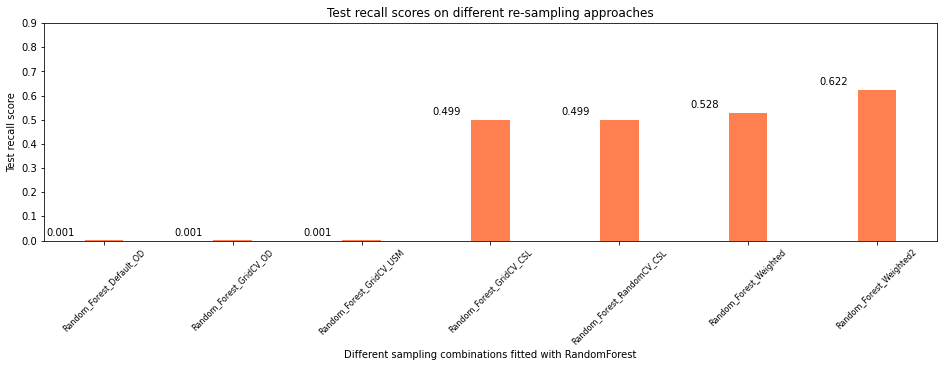

In [ ]:
fig = plt.figure(figsize = [16, 4])
plt.bar(model_comparison['Model'], model_comparison['Test_Recall'], color = 'coral', width=0.3)
plt.xlabel('Different sampling combinations fitted with RandomForest')
plt.ylabel('Test recall score')
plt.title('Test recall scores on different re-sampling approaches')
plt.xticks( rotation = 45, fontsize=8, horizontalalignment="center")
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(model_comparison['Test_Recall']):
  plt.text(i-0.45, v+0.02, str(round(v, 3)))

plt.show()

GRID_CV_OD, GRID_CV_USM, GRID_CV_CSL, Weighted2

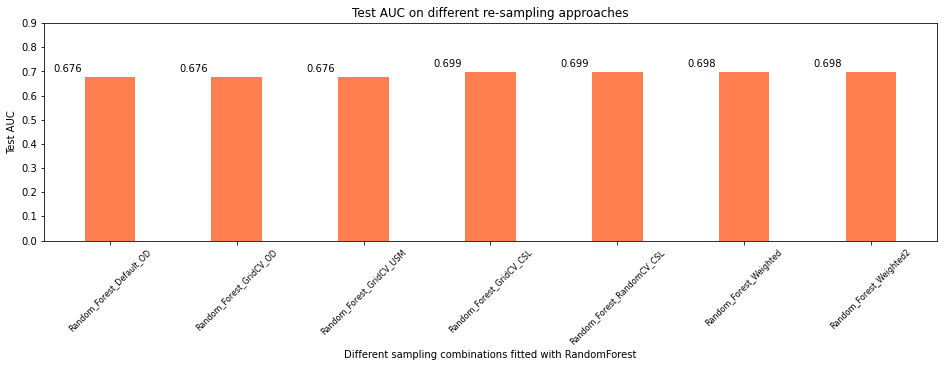

In [ ]:
fig = plt.figure(figsize = [16, 4])
plt.bar(model_comparison['Model'], model_comparison['Test_AUC'], color = 'coral', width=0.4)
plt.xlabel('Different sampling combinations fitted with RandomForest')
plt.ylabel('Test AUC')
plt.title('Test AUC on different re-sampling approaches')
plt.xticks( rotation = 45, fontsize=8, horizontalalignment="center")
plt.yticks(np.arange(0, 0.95, 0.1))

for i, v in enumerate(model_comparison['Test_AUC']):
  plt.text(i-0.45, v+0.02, str(round(v, 3)))

plt.show()

### Train Metrics

In [ ]:
##Creating a dataframe to store the accuracy, precision, recall values
#ROC, precision, recall, acccuracy

#Accuracy Train:  0.6759054136103316
#Precision Train: 0.16000551901761487
#Recall Train: 0.7007049345417925
#AUC score 0.7563718855082012

Comparison_dict = {'Random_Forest_Default_OD':[0.9999384630532171,1.0,0.9992447129909365,1.0],
                       'Random_Forest_GridCV_OD':[0.9999384630532171,1.0,0.9992447129909365,1.0],
                       'Random_Forest_GridCV_USM':[0.9996223564954683,1.0,0.9992447129909365,1.0],
                       'Random_Forest_GridCV_CSL':[0.7663770327704754,0.18956020959938394,0.5701409869083585,0.7567963704627501],
                       'Random_Forest_RandomCV_CSL':[0.757421112223298,0.1678170253078901,0.499496475327291,0.6986872053207669],
                       'Random_Forest_Weighted':[0.6759054136103316,0.16000551901761487, 0.7007049345417925,0.7563718855082012]}

model_comparison = pd.DataFrame(Comparison_dict)
model_comparison['Metrics'] = ['Train_Accuracy','Train_Precision','Train_Recall','Train_AUC']

#re-arranging the column order
cols = model_comparison.columns.tolist()
cols = cols[-1:] + cols[:-1]
model_comparison = model_comparison[cols]

#pivot
model_comparison = model_comparison.transpose()
model_comparison = model_comparison[1:].reset_index(drop=False)
model_comparison.columns = ['Model','Train_Accuracy','Train_Precision','Train_Recall','Train_AUC']
model_comparison

,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_AUC
0,Random_Forest_Default_OD,0.999938,1,0.999245,1
1,Random_Forest_GridCV_OD,0.999938,1,0.999245,1
2,Random_Forest_GridCV_USM,0.999622,1,0.999245,1
3,Random_Forest_GridCV_CSL,0.766377,0.18956,0.570141,0.756796
4,Random_Forest_RandomCV_CSL,0.757421,0.167817,0.499496,0.698687
5,Random_Forest_Weighted,0.675905,0.160006,0.700705,0.756372
